In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Let's take a look to this dataframe

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


sepal_length, sepal_width, petal_length, petal_width are input features.
species is an output feature.
we need to predict the output value based on input features

In [4]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


statistical view of the input features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This shows that there are no null values in dataset. 
input features are float type 
and output feature is object or string type

# Dataset Visualization

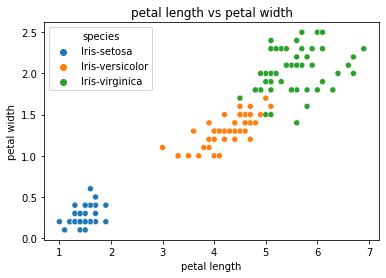

In [7]:
sns.scatterplot(df.petal_length, df.petal_width, hue = df.species)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width")
plt.show()

We can see that using petal length and petal width iris-setosa can be distinguish clearly but there is some overlapping in iris-versicular and iris-virginica

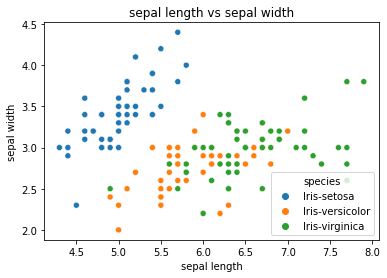

In [8]:
sns.scatterplot(df.sepal_length, df.sepal_width, hue = df.species)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs sepal width")
plt.show()

using sepal length and sepal width it is very difficult distinguish between iris-versicular and iris-virginica

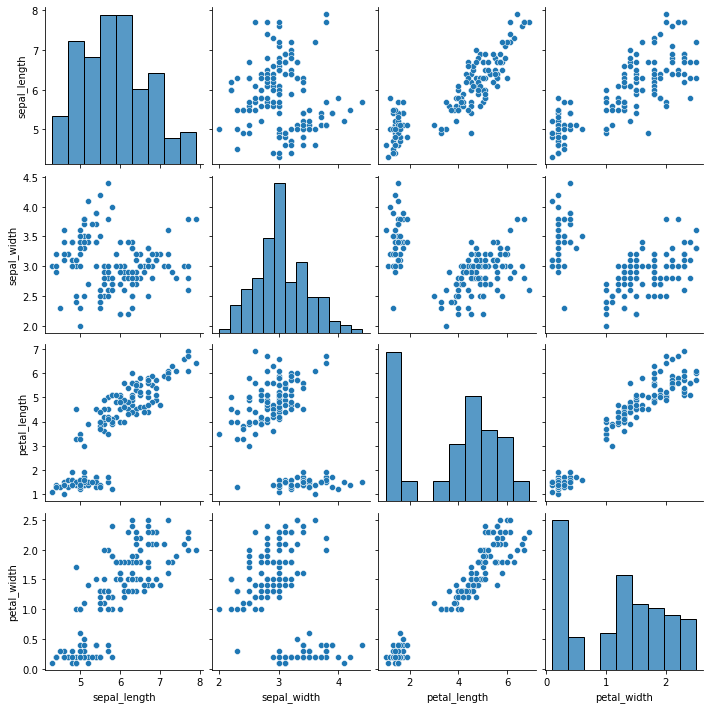

In [9]:
sns.pairplot(df)

<AxesSubplot:>

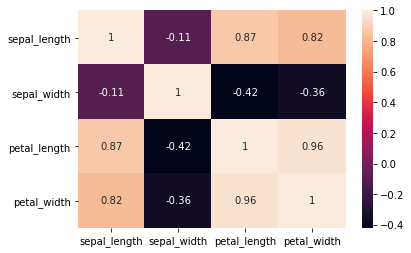

In [10]:
sns.heatmap(df.corr(), annot = True)

1. This shows the correlation between input features
2. sepal length is highly positively correlated with petal length and petal width
3. sepal length is negativley correlated with petal length and petal width
4. petal length and petal width has very large correlation

sepal_length       AxesSubplot(0.125,0.125;0.168478x0.755)
sepal_width     AxesSubplot(0.327174,0.125;0.168478x0.755)
petal_length    AxesSubplot(0.529348,0.125;0.168478x0.755)
petal_width     AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

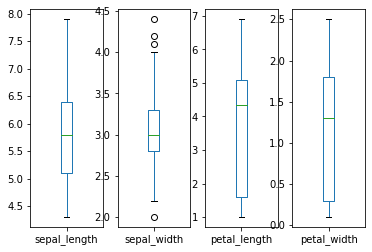

In [11]:
df.plot(kind = "box", subplots = True, sharex = False, sharey  = False)

sepal width contains some of the outliers

# Selection of input and output features

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standardization 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# K-Nearest Neighbor Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=25)
model= knn.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

In [19]:
pred[:10]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

In [21]:
print("Accuracy of model is: ", accuracy_score(y_test, pred))

Accuracy of model is:  1.0


In [22]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Estimation of best K

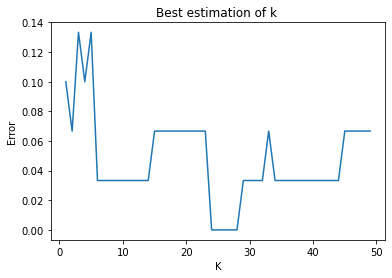

In [23]:
import matplotlib.pyplot as plt
error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    model= knn.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    error.append(np.mean(pred != y_test))
                         
#plotting graph of error vs value of k                         
plt.plot(range(1, 50), error)
plt.xlabel("K")
plt.ylabel("Error")
plt.title("Best estimation of k ")
plt.show()

1.Error is low when Value of k is between 25 to 28